#### Importing the libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


#### Importing the file

In [3]:
uniRank = pd.read_csv('qs-world-university-rankings-2017-to-2022-V2.csv')

In [4]:
uniRank.head()

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968


In [5]:
uniRank.shape

(6482, 15)

#### Checking the information about the dataset

In [6]:
uniRank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university              6482 non-null   object 
 1   year                    6482 non-null   int64  
 2   rank_display            6414 non-null   object 
 3   score                   2820 non-null   float64
 4   link                    6482 non-null   object 
 5   country                 6482 non-null   object 
 6   city                    6304 non-null   object 
 7   region                  6482 non-null   object 
 8   logo                    6482 non-null   object 
 9   type                    6470 non-null   object 
 10  research_output         6480 non-null   object 
 11  student_faculty_ratio   6407 non-null   float64
 12  international_students  6318 non-null   object 
 13  size                    6480 non-null   object 
 14  faculty_count           6404 non-null   

In [7]:
uniRank.describe()

,year,score,student_faculty_ratio
count,6482.000000,2820.000000,6407.000000
mean,2019.693613,46.595532,13.264554
std,1.716683,18.813110,6.604294
min,2017.000000,23.500000,1.000000
25%,2018.000000,31.800000,9.000000
50%,2020.000000,40.600000,12.000000
75%,2021.000000,58.025000,17.000000
max,2022.000000,100.000000,67.000000


#### Checking missing values

In [8]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_values_table(uniRank)

Your selected dataframe has 15 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
score,3662,56.5
city,178,2.7
international_students,164,2.5
faculty_count,78,1.2
student_faculty_ratio,75,1.2
rank_display,68,1.0
type,12,0.2
research_output,2,0.0
size,2,0.0


#### Since only very less number of rows are missing data in the below columns, I am going to drop them.

In [9]:
uniRank = uniRank.dropna(subset=['city','international_students','faculty_count','student_faculty_ratio','rank_display','type','research_output','size'])

In [10]:
missing_values_table(uniRank)

Your selected dataframe has 15 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
score,3365,55.3


#### Since columns link and logo doesn't have any useful information, I am going to drop them. Also, the "score" column might be highly helpful for analysis, roughly 56% of its data are missing. So, I am also dropping this column as well.

In [11]:
uniRank = uniRank.drop(['link','logo','score'],axis=1)

#### Converting the columns that are object type but contain numeric data to float type. First, removing the special characters in these columns and then converting to float

In [12]:
uniRank['student_faculty_ratio'].replace(',','',regex=True,inplace = True)
uniRank['international_students'].replace(',','',regex= True,inplace = True)
uniRank['faculty_count'].replace(',','',regex= True,inplace = True)
uniRank['rank_display'].replace('-','',regex= True,inplace = True)

In [13]:
uniRank['student_faculty_ratio'] = uniRank['student_faculty_ratio'].astype(float)
uniRank['international_students'] = uniRank['international_students'].astype(float)
uniRank['faculty_count'] = uniRank['faculty_count'].astype(float)
uniRank['rank_display'] = uniRank['rank_display'].astype(float)

#### Displaying the number of universities that were ranked from 2017 to 2022. As we can see, the numbers are increasing year by year

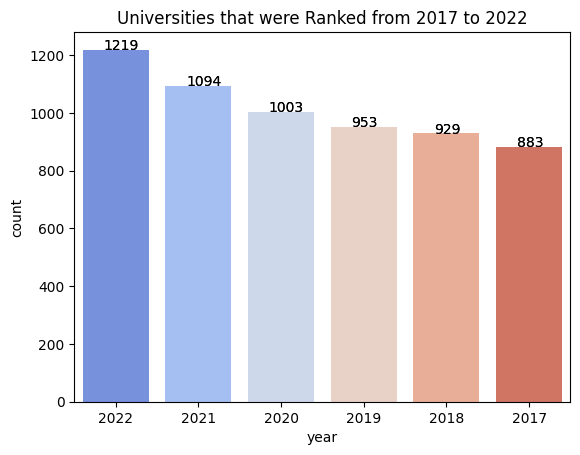

In [76]:
ax = sns.countplot(data=uniRank, x='year',order = uniRank['year'].value_counts().index,palette='coolwarm')
ax.set_title("Universities that were Ranked from 2017 to 2022")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()



#### Plotting the number of universities by region. Europe tends to be the continent with the most colleges. Asia and North America come next with Africa being the continent with least ranked universities.

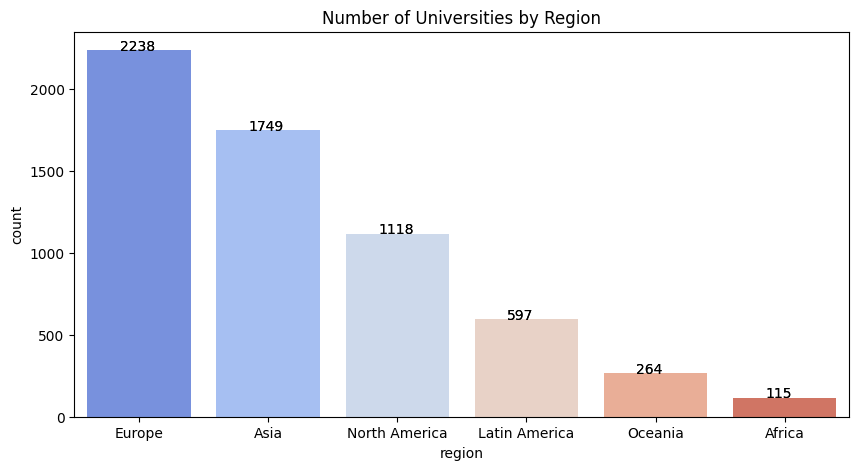

In [75]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=uniRank, x='region',order = uniRank['region'].value_counts().index,palette='coolwarm');
ax.set_title('Number of Universities by Region')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

#### Composition of university types (Public and Private). Almost 82% of the universities ranked are public whereas 18% are private.

([<matplotlib.patches.Wedge at 0x16dde1690>,
 [Text(-0.9234187207997966, 0.5977439803766053, 'Public'),
  Text(0.9234187207997966, -0.5977439803766054, 'Private')],
 [Text(-0.5036829386180708, 0.3260421711145119, '81.7%'),
  Text(0.5036829386180708, -0.32604217111451195, '18.3%')])

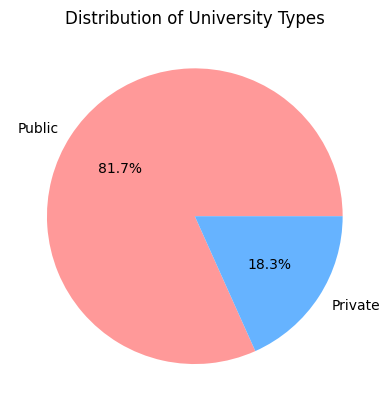

In [19]:
pie_bar_colors = ['#ff9999','#66b3ff']
plt.title("Distribution of University Types")
plt.pie(uniRank['type'].value_counts().values,labels = uniRank['type'].value_counts().index,autopct='%1.1f%%',colors=pie_bar_colors)

#### Data contains 2 values for 'Very High'. So, I am replacing 'Very high' with 'Very High' so that I can group them together.

In [18]:
uniRank['research_output'] = uniRank['research_output'].replace('Very high','Very High')

In [19]:
uniRank['research_output'].value_counts()

Very High    4338
High         1330
Medium        370
Low            43
Name: research_output, dtype: int64

#### Visualizing the count of universities by research output and their type.

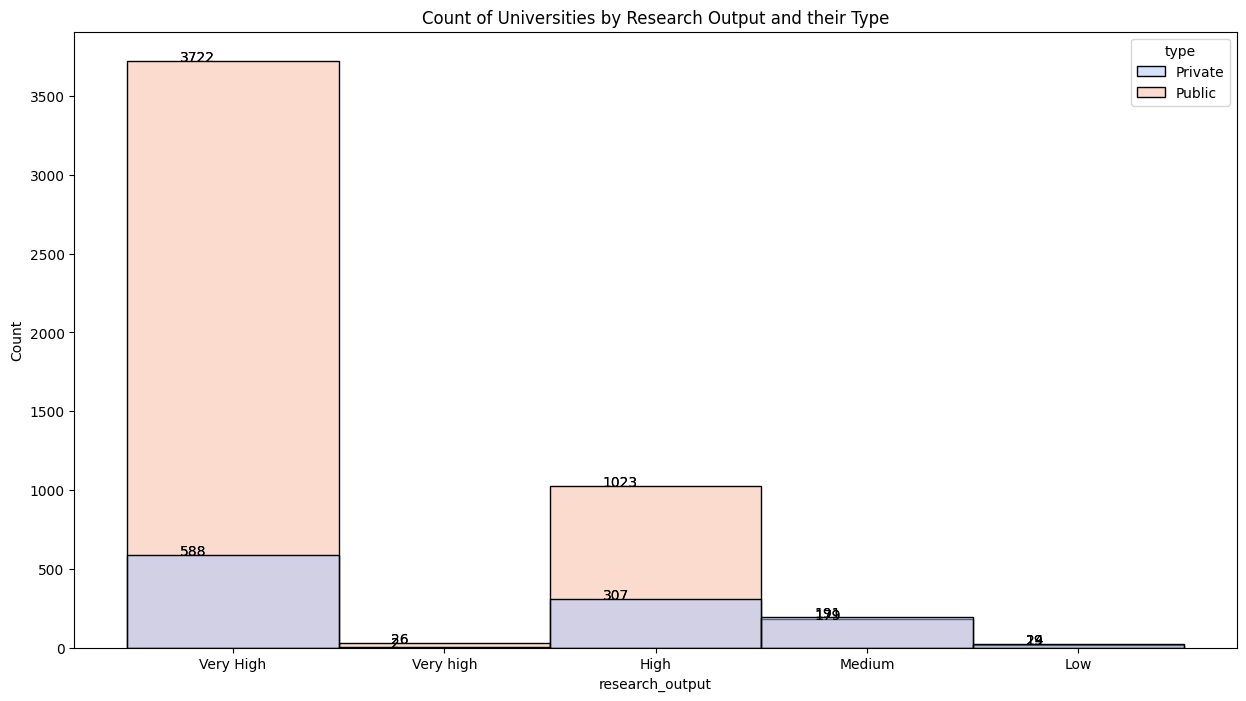

In [74]:
plt.figure(figsize=(15,8))
ax = sns.histplot(binwidth=2,
            x='research_output',
            hue='type',
            data=uniRank,
            stat="count",
            element = 'bars',
            palette='coolwarm')
sns.move_legend(ax, "upper right")
ax.set_title('Count of Universities by Research Output and their Type')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

#### Visualizing the count of universities by research output and their size.

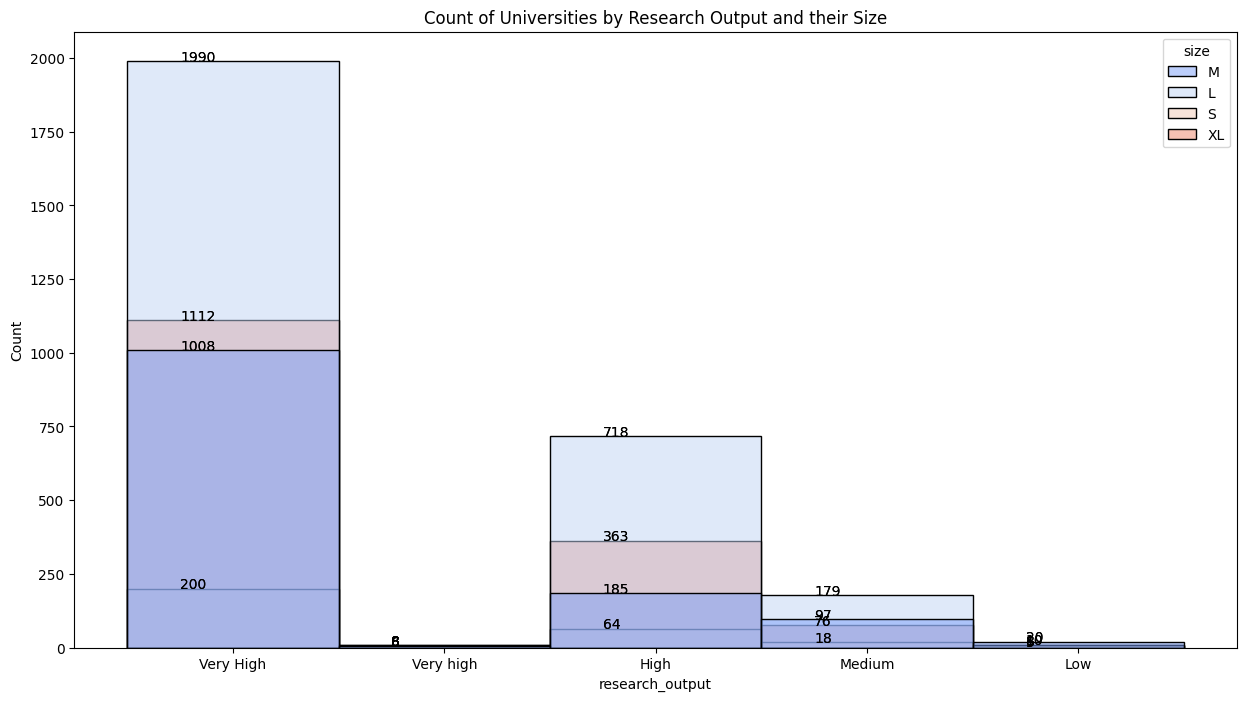

In [73]:
plt.figure(figsize=(15,8))
ax = sns.histplot(binwidth=2,
            x='research_output',
            hue='size',
            data=uniRank,
            stat="count",
            element = 'bars',
            palette='coolwarm')
sns.move_legend(ax, "upper right")
ax.set_title('Count of Universities by Research Output and their Size')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

#### Plotting the type of universities against their student faculty ratio. 

Text(0.5, 0.98, 'Type of Universities and their Student Faculty Ratio')

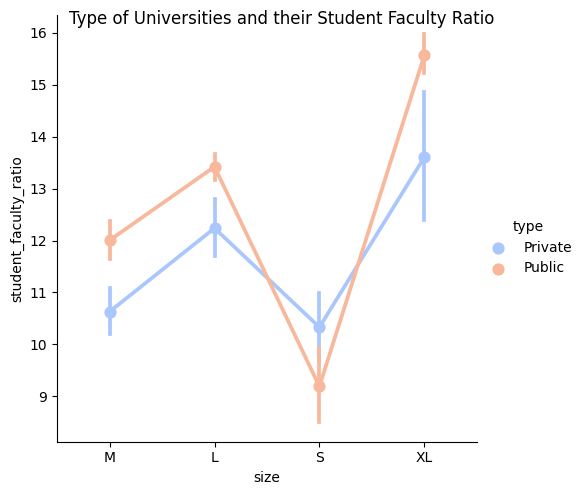

In [72]:
ax = sns.catplot(x="size", y="student_faculty_ratio", kind="point", data=uniRank, hue='type',palette='coolwarm');
ax.fig.suptitle("Type of Universities and their Student Faculty Ratio",fontsize=12)

In [43]:
mostPreferredCountry = pd.DataFrame(uniRank.groupby(['country'], sort=False)['international_students'].sum().sort_values(ascending=False)[:10])
mostPreferredCountry

,international_students
country,
United States,2016897.823
United Kingdom,1885596.242
Australia,1334084.630
Canada,753231.600
Germany,629998.591
France,546821.506
Netherlands,402373.134
China (Mainland),380128.246
Japan,280854.488


#### USA is the most preferred country by international students followed by UK.

Text(0.5, 1.0, 'Most Preferred Country by International Students')

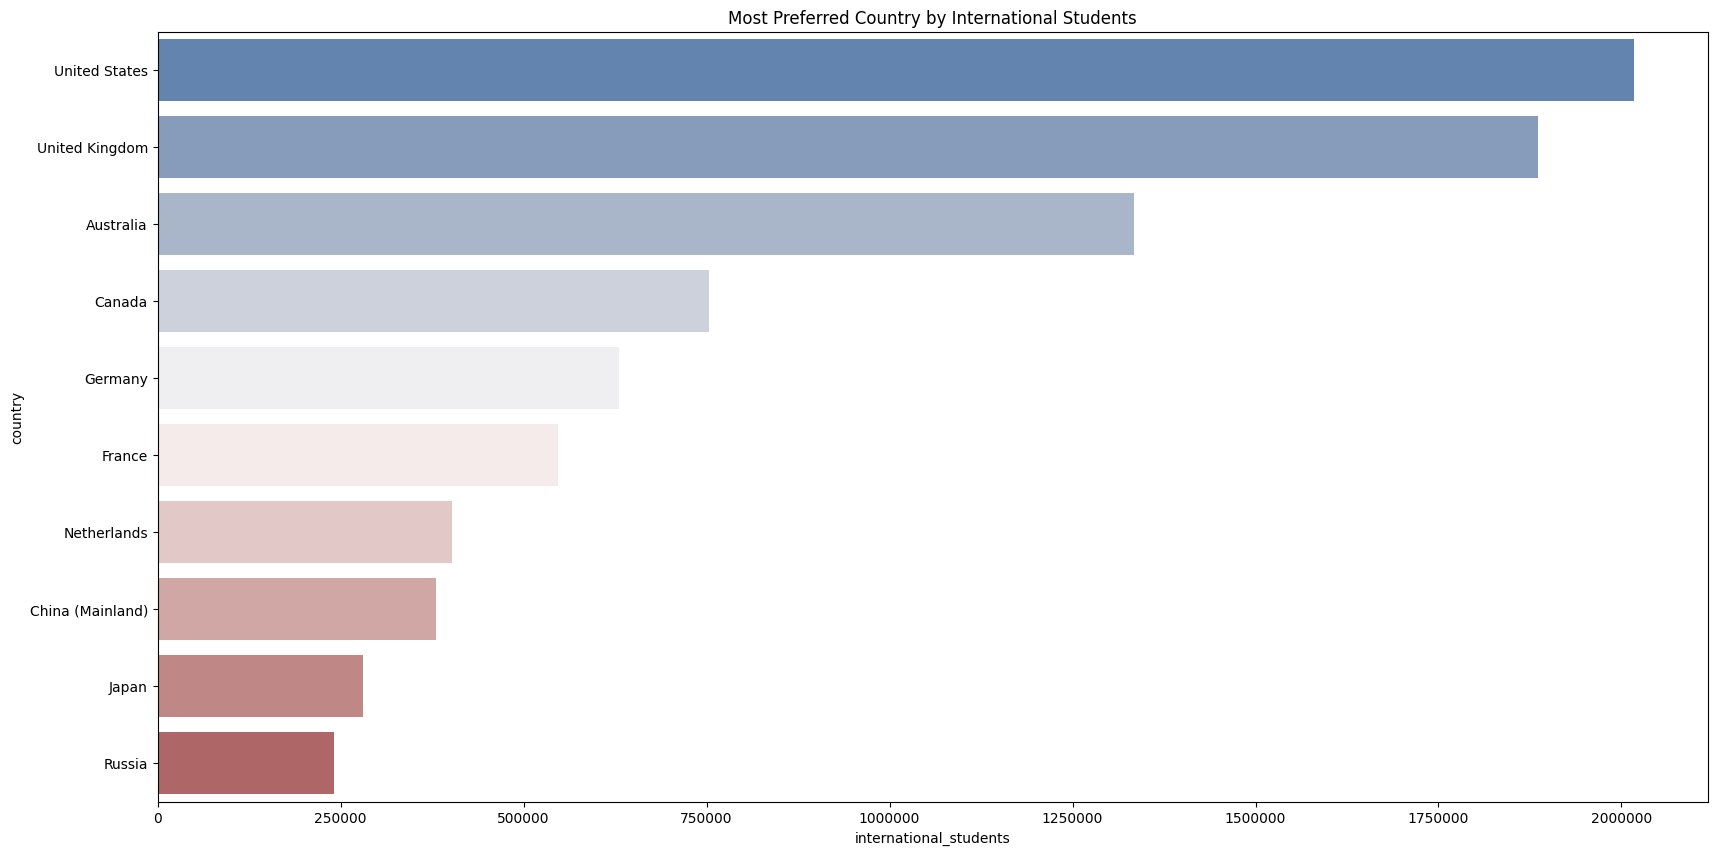

In [61]:
plt.figure(figsize=(20,10))

sns.barplot(data=mostPreferredCountry, x='international_students', y=mostPreferredCountry.index,palette='vlag');
plt.ticklabel_format(style='plain', axis='x')
plt.title('Most Preferred Country by International Students')


In [55]:
mostPreferredCity = pd.DataFrame(uniRank.groupby(['city'], sort=False)['international_students'].sum().sort_values(ascending=False)[:10])
mostPreferredCity

,international_students
city,
London,439282.892
Sydney,336984.000
Melbourne,280869.480
Hong Kong,205188.000
Buenos Aires,201761.294
Paris,171163.575
New York City,167672.664
Toronto,165297.900
Brisbane,149623.000


#### London is the most preferred city by international students followed by Sydney.


Text(0.5, 1.0, 'Most Preferred City by International Students')

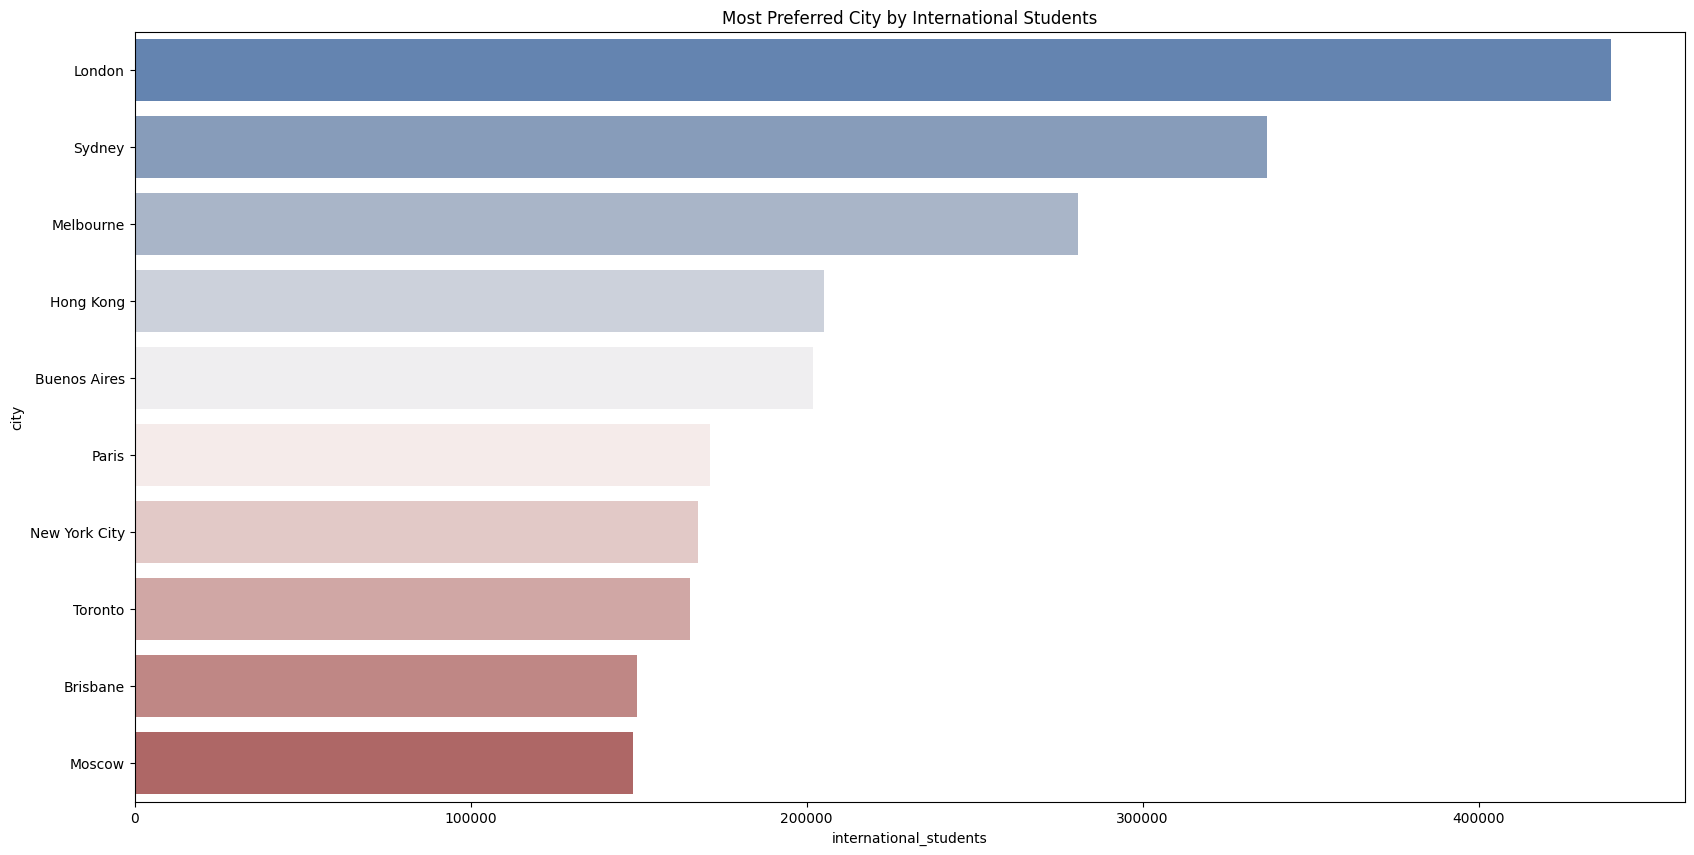

In [60]:
plt.figure(figsize=(20,10))

sns.barplot(data=mostPreferredCity, x='international_students', y=mostPreferredCity.index,palette='vlag');
plt.ticklabel_format(style='plain', axis='x')
plt.title('Most Preferred City by International Students')



#### We can see from the graph below that more number of international students prefer public universities.

<AxesSubplot: title={'center': 'Distribution of International Students By University Type through 2017 to 2022'}, xlabel='type', ylabel='international_students'>

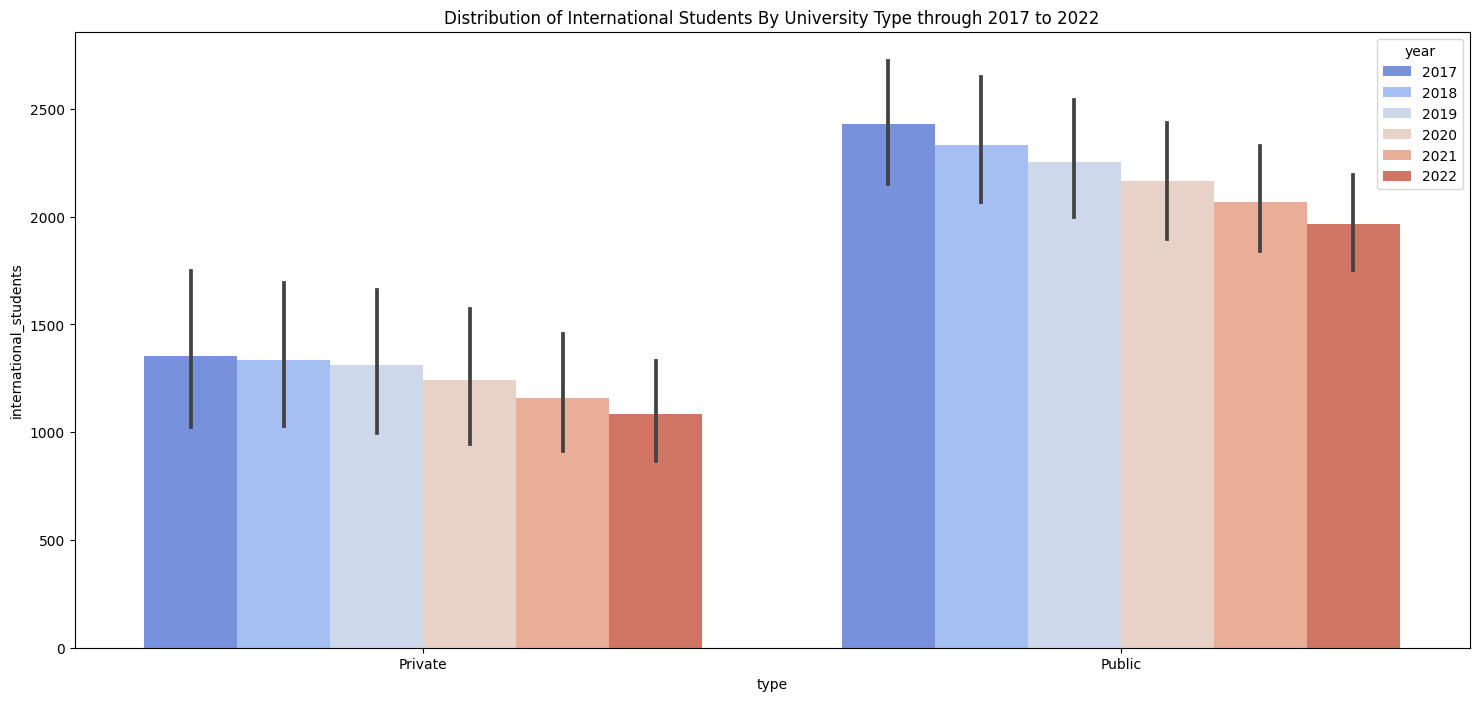

In [69]:
plt.figure(figsize=(18,8))
plt.title('Distribution of International Students By University Type through 2017 to 2022')
sns.barplot(data=uniRank,x="type", y='international_students', hue='year',palette='coolwarm')


Text(0.5, 0.98, 'Faculty Count by International Students Count')

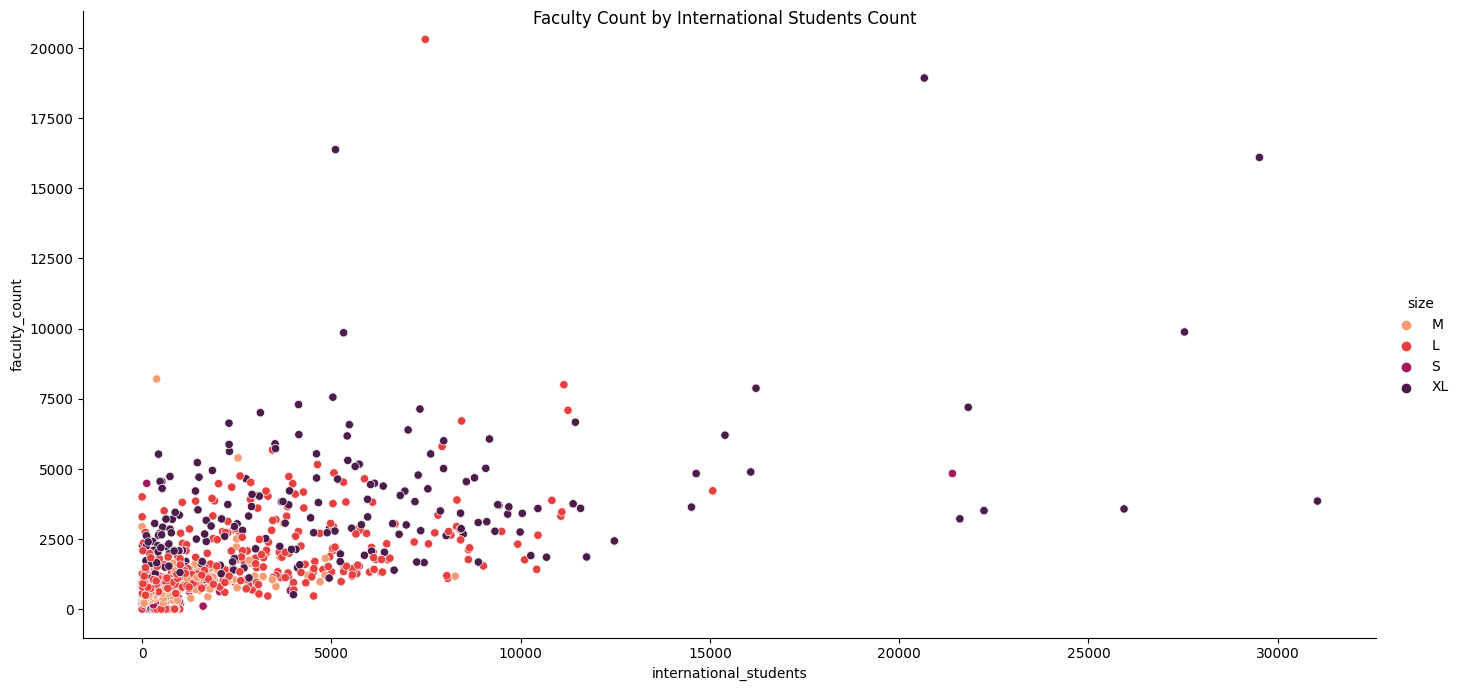

In [71]:
rel=sns.relplot(x='international_students', y='faculty_count', hue='size',kind='scatter',data=uniRank,color='red',height=7,aspect=2,palette='rocket_r')
rel.fig.suptitle('Faculty Count by International Students Count')